This Notebook demonstrates the use of Neural Network to approximate the solution from its differential equation.

EQUATION : dy/dx + y = 0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Pytorch

In [5]:
import torch
import torch.nn as nn

Creating the Neural Netwrok

In [7]:
class MyNN(nn.Module):
    def __init__(self):
        super(MyNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 32),
            nn.Tanh(),
            nn.Linear(32, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return 1 + self.network(x)  #HERE THE ONE ADDED REPRESENTS THE INITIAL CONDITION WHEN X = 0, Y = 1

Defining an Loss Function which penalizes the model when its output deviate from 0.

In [9]:
def loss_funn(model, x):
    y = model(x)
    dy_dt = torch.autograd.grad(y, x, torch.ones_like(y), create_graph = True)[0]
    return torch.mean((dy_dt + y) ** 2)   #dy/dx + y = 0

Defining the training sequence.

In [11]:
def train(model, optimizer, epochs = 1000):
    x = torch.linspace(0, 10, 100).unsqueeze(1).requires_grad_(True)
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = loss_funn(model, x)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print(f"Epochs : {epoch + 1}\tLoss : {loss.item()}\n")

    return x, model(x).detach().numpy()

In [12]:
model = MyNN()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [13]:
x, y_pred = train(model, optimizer)

Epochs : 1	Loss : 0.6930808424949646

Epochs : 51	Loss : 0.001386322663165629

Epochs : 101	Loss : 0.00031876203138381243

Epochs : 151	Loss : 0.00020133107318542898

Epochs : 201	Loss : 0.00015649294073227793

Epochs : 251	Loss : 0.00012583052739501

Epochs : 301	Loss : 0.00010242357529932633

Epochs : 351	Loss : 8.413413888774812e-05

Epochs : 401	Loss : 6.966422370169312e-05

Epochs : 451	Loss : 5.815537952003069e-05

Epochs : 501	Loss : 4.899079067399725e-05

Epochs : 551	Loss : 4.168745726929046e-05

Epochs : 601	Loss : 3.585244849091396e-05

Epochs : 651	Loss : 3.116235166089609e-05

Epochs : 701	Loss : 2.7356069040251896e-05

Epochs : 751	Loss : 2.4226768800872378e-05

Epochs : 801	Loss : 2.161462361982558e-05

Epochs : 851	Loss : 1.9398597942199558e-05

Epochs : 901	Loss : 1.7487487639300525e-05

Epochs : 951	Loss : 1.5815385268069804e-05



PLOTTING THE INPUT 'X' AND PREDICTED 'Y'

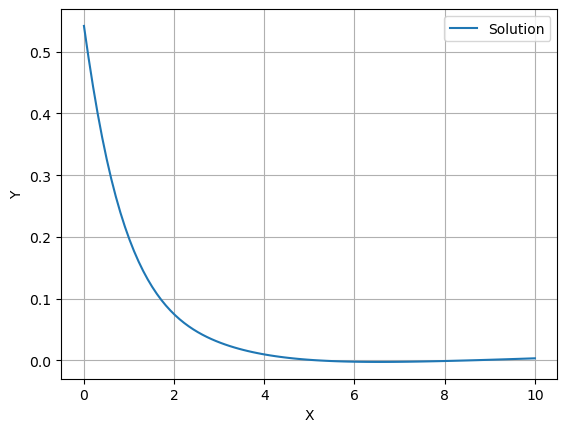

In [15]:
plt.plot(x.detach().numpy(), y_pred, label = 'Solution')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
